In [62]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import functions
from tqdm import tqdm

In [51]:
label_names = ['no', 'yes', 'on', 'off', 'down', 'up', 'left', 'right', 'go', 'wow']

data = np.load('voice_samples.npz')

X_train_time, y_train_words, X_test_time, y_test_words = [data[f] for f in data.files]

y_train_num = functions.y_to_num(y_train_words, label_names)
y_test_num = functions.y_to_num(y_test_words, label_names)

In [116]:
from scipy.io import wavfile
wavfile.write('output_signal.wav', 16000, X_test_time[0, :])

In [52]:
print(X_train_time.shape)
print(X_test_time.shape)

(15000, 16000)
(2000, 16000)


In [53]:
ex = X_train_time[5002, :]
print(ex.shape)

(16000,)


In [54]:
f, t, Sxx = spectrogram(ex, window='hamming')
print(Sxx.shape)

(129, 71)


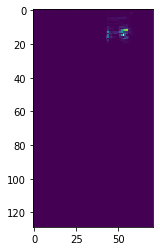

In [55]:
plt.imshow(Sxx)
plt.show()

In [56]:
X_train_spec = np.array([])
X_test_spec= np.array([])

In [63]:
for it in tqdm(range(X_train_time.shape[0])):
    tmp = X_train_time[it, :]
    f, t, Sxx = spectrogram(tmp, window='hamming')
    X_train_spec = np.append(X_train_spec, Sxx)
    
for it in tqdm(range(X_test_time.shape[0])):
    tmp = X_test_time[it, :]
    f, t, Sxx = spectrogram(tmp, window='hamming')
    X_test_spec = np.append(X_test_spec, Sxx)

100%|███████████████████████████████████████████████████████| 2000/2000 [01:52<00:00,  9.03it/s]


In [66]:
print(X_test_spec.shape)

(18318000,)


In [68]:
X_train_spec = np.reshape(X_train_spec, (X_train_time.shape[0], 129, 71))
X_test_spec = np.reshape(X_test_spec, (X_test_time.shape[0], 129, 71))

In [70]:
print(X_train_spec.shape)
print(X_test_spec.shape)

(15000, 129, 71)
(2000, 129, 71)


yes


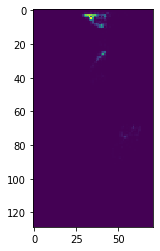

2883752.8272911464
3.8424559749145957e-05
float64


In [103]:
idx = 210
print(y_test_words[idx])
plt.imshow(X_test_spec[idx,:,:])
plt.show()
print(np.mean(X_test_spec[idx,:,:]))
print(np.min(X_test_spec[idx,:,:]))
print(X_test_spec.dtype)

In [104]:
sigma = np.std(X_train_spec)
print(sigma)

328009972.8504623


In [105]:
X_train_spec , X_test_spec = X_train_spec/sigma , X_test_spec/sigma

yes


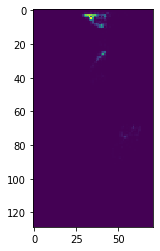

0.008791662040732617
2.8494536514507542
float64


In [107]:
idx = 210
print(y_test_words[idx])
plt.imshow(X_test_spec[idx,:,:])
plt.show()
print(np.mean(X_test_spec[idx,:,:]))
print(np.max(X_test_spec[idx,:,:]))
print(X_test_spec.dtype)

In [117]:
X_train_spec , X_test_spec = X_train_spec.astype(np.float16) , X_test_spec.astype(np.float16)
y_train_num , y_test_num = y_train_num.astype(np.uint8), y_test_num.astype(np.uint8)

In [118]:
idx = 210
print(y_test_words[idx])
print(np.mean(X_test_spec[idx,:,:]))
print(np.max(X_test_spec[idx,:,:]))
print(X_test_spec.dtype)

yes
0.00879
2.85
float16


In [119]:
"""execute this code!!!"""
np.savez_compressed('voice_spectrograms.npz',
                    X_train = X_train_spec,
                    y_train = y_train_num,
                    X_test = X_test_spec,
                    y_test = y_test_num)